Phát hiện tấn công DDoS bằng mô hình Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Tải tập dữ liệu
tải tập dữ liệu huấn luyện và kiểm tra từ các file CSV. Mỗi dòng biểu diễn một phiên kết nối mạng với các đặc trưng và nhãn (`normal` hoặc `anomaly`)

In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")


Tiền xử lý dữ liệu
tách đặc trưng và nhãn, sau đó mã hóa các đặc trưng dạng chữ bằng `LabelEncoder` để mô hình có thể xử lý. Nhãn `class` cũng được mã hóa thành số.

In [3]:
x_train = train_df.drop(columns=['class'])
y_train = train_df['class']
x_test = test_df.drop(columns=['class'])
y_test = test_df['class']

# Encode categorical features
for column in x_train.columns:
    if x_train[column].dtype == object:
        le = LabelEncoder()
        x_train[column] = le.fit_transform(x_train[column])
        x_test[column] = le.transform(x_test[column])

# Encode target labels
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)
y_test = label_encoder_y.transform(y_test)


Huấn luyện mô hình
sử dụng `DecisionTreeClassifier`, một mô hình học máy tạo ra cây quyết định để phân loại các phiên kết nối dựa trên các mẫu trong dữ liệu huấn luyện.

In [4]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

Đánh giá mô hình
sử dụng mô hình để dự đoán nhãn cho tập kiểm tra, sau đó tính độ chính xác và in ra báo cáo phân loại với các chỉ số precision, recall và F1-score.

In [5]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder_y.classes_)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", report)


Accuracy: 77.52%
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.96      0.63      0.76     12833
      normal       0.66      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.78      0.77     22544



Trực quan hóa kết quả
vẽ biểu đồ confusion matrix để dễ dàng quan sát mức độ chính xác của mô hình trong việc phân biệt giữa truy cập bình thường và tấn công.

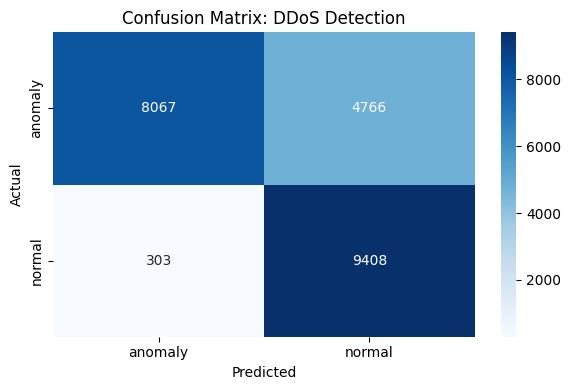

In [6]:
conf_matrix = pd.crosstab(label_encoder_y.inverse_transform(y_test),
                          label_encoder_y.inverse_transform(y_pred),
                          rownames=['Actual'],
                          colnames=['Predicted'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: DDoS Detection')
plt.tight_layout()
plt.show()
